In [37]:
import os
from utility import Utility
import numpy as np
import matplotlib.pyplot as plt

In [38]:
u = Utility("base")
name = u.get_name()
importance_score = []

In [39]:
with open(f"importances/self-pruned-{name}/block_0.txt",'r') as f:
    f.seek(0, os.SEEK_END)
    isempty = f.tell() == 0
    f.seek(0)
    step = []
    ind_step = []
    if not isempty:
        for i in f:
            score,index = i[:-1].split(',')
            step.append(float(score))
            ind_step.append(int(index))
    else:
        print(f"block_0 is empty file")
    
    importance_score.append(step)
    importance_score.append(ind_step)

In [50]:
X = np.transpose(importance_score)

In [54]:
X

array([[714.25567627,   0.        ],
       [709.02935791,   1.        ],
       [726.40936279,   2.        ],
       ...,
       [725.14056396, 509.        ],
       [702.69573975, 510.        ],
       [711.00915527, 511.        ]])

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0).fit(X)

In [66]:
kmeans.cluster_centers_

array([[706.67368892, 257.        ],
       [707.94546296,  85.5       ],
       [709.50508361, 427.        ]])

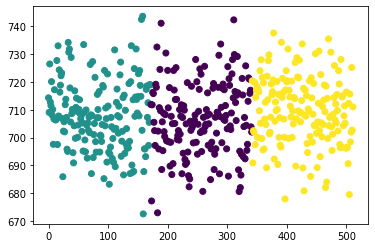

In [65]:
plt.scatter(X[:,1], X[:,0], c=kmeans.labels_)
plt.show()